# Unit 5 - Financial Planning


In [54]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import json
%matplotlib inline

In [55]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [56]:
# Set current amount of crypto assets
current_btc=1.2
current_eth=5.3

In [57]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [58]:
# Fetch current BTC price
btc_ret = requests.get(btc_url).json()

# Fetch current ETH price
eth_ret = requests.get(eth_url).json()
# print(json.dumps(eth_ret, indent=4))

In [59]:
# Compute current value of my crpto
my_btc = btc_ret['data']["1"]["quotes"]["USD"]["price"]

my_btc_value = my_btc * current_btc

my_eth = eth_ret["data"]["1027"]["quotes"]["USD"]["price"]

my_eth_value = my_eth * current_eth
# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 12970.71 BTC is $15564.85
The current value of your 412.67 ETH is $2187.15


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [60]:
# Current amount of shares
my_agg = 200
my_spy = 50

In [61]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [62]:
# Format current date as ISO format
today = pd.Timestamp("2020-10-23", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
df_portfolio = alpaca.get_barset(
    tickers,
    timeframe,
    start = today,
    end = today
).df

# Preview DataFrame
df_portfolio.head()

AGG                                     SPY  \
                            open    high    low   close   volume    open   
2020-10-23 00:00:00-04:00  117.3  117.52  117.3  117.47  3482671  345.93   

                                                             
                             high     low   close    volume  
2020-10-23 00:00:00-04:00  345.99  343.13  345.76  38718140

In [63]:
# Pick AGG and SPY close prices
agg_close_price = float(df_portfolio["AGG"]["close"])
spy_close_price = float(df_portfolio["SPY"]["close"])
# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $117.47
Current SPY closing price: $345.76


In [64]:
# Compute the current value of shares
my_spy_value = spy_close_price * my_spy
my_agg_value = agg_close_price * my_agg
# Print current value of share
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $17288.00
The current value of your 200 AGG shares is $23494.00


### Savings Health Analysis

In [84]:
# Set monthly household income
monthly_income = 12000

# Create savings DataFrame
df_savings = pd.DataFrame({'amount': [my_btc_value + my_eth_value, my_spy_value + my_agg_value]},index=["crypto", "shares"])

# Display savings DataFrame
display(df_savings)

,amount
crypto,17752.003
shares,40782.000


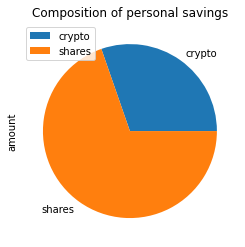

In [85]:
# Plot savings pie chart
df_savings.plot.pie(y="amount", title="Composition of personal savings")

In [87]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
savings = my_spy_value + my_agg_value + my_btc_value + my_eth_value

# Validate saving health
if savings > emergency_fund:
    print("congratulations for having more than enough money in savings!")
elif saving == emergency_fund:
    print("congratulations for reaching your savings goal!")
elif savings < emergency_fund:
    print(f"You are:{savings - emergency_fund} away from reaching your savings goal")
else:
    print("what are you even doing, get your life together.")

congratulations for having more than enough money in savings!


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [68]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2015-08-07', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2020-08-07', tz='America/New_York').isoformat()

In [70]:
# Get 5 years' worth of historical data for SPY and AGG
df_stock_data = alpaca.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df

# Display sample data
df_stock_data.head()

AGG                                         SPY  \
                             open      high      low   close   volume    open   
2015-08-07 00:00:00-04:00  109.14  109.2750  109.035  109.21  2041167  208.16   
2015-08-10 00:00:00-04:00  109.15  109.1700  108.920  109.06  1149778  209.28   
2015-08-11 00:00:00-04:00  109.42  109.5765  109.284  109.42  1420907  208.98   
2015-08-12 00:00:00-04:00  109.55  109.7100  109.350  109.36  1468979  207.11   
2015-08-13 00:00:00-04:00  109.36  109.3651  109.110  109.15  1465173  208.73   

                                                              
                             high     low   close     volume  
2015-08-07 00:00:00-04:00  208.34  206.87  207.93   87669782  
2015-08-10 00:00:00-04:00  210.67  209.28  210.58   66755890  
2015-08-11 00:00:00-04:00  209.47  207.76  208.63   88424557  
2015-08-12 00:00:00-04:00  209.14  205.36  208.89  136171450  
2015-08-13 00:00:00-04:00  209.55  208.01  208.63   77197796

In [71]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*30)


In [72]:
# Printing the simulation input data
MC.portfolio_data.head()


AGG                                      \
                             open      high      low   close   volume   
2015-08-07 00:00:00-04:00  109.14  109.2750  109.035  109.21  2041167   
2015-08-10 00:00:00-04:00  109.15  109.1700  108.920  109.06  1149778   
2015-08-11 00:00:00-04:00  109.42  109.5765  109.284  109.42  1420907   
2015-08-12 00:00:00-04:00  109.55  109.7100  109.350  109.36  1468979   
2015-08-13 00:00:00-04:00  109.36  109.3651  109.110  109.15  1465173   

                                           SPY                          \
                          daily_return    open    high     low   close   
2015-08-07 00:00:00-04:00          NaN  208.16  208.34  206.87  207.93   
2015-08-10 00:00:00-04:00    -0.001374  209.28  210.67  209.28  210.58   
2015-08-11 00:00:00-04:00     0.003301  208.98  209.47  207.76  208.63   
2015-08-12 00:00:00-04:00    -0.000548  207.11  209.14  205.36  208.89   
2015-08-13 00:00:00-04:00    -0.001920  208.73  209.55  208.01  208.63   

                                                   
                              volume daily_return  
2015-08-07 00:00:00-04:00   87669782          NaN  
2015-08-10 00:00:00-04:00   66755890     0.012745  
2015-08-11 00:00:00-04:00   88424557    -0.009260  
2015-08-12 00:00:00-04:00  136171450     0.001246  
2015-08-13 00:00:00-04:00   77197796    -0.001245

In [73]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.986509,1.000798,1.010803,0.993126,1.005438,1.003343,0.994877,1.005258,1.006001,1.007593,...,1.003387,1.014247,0.999258,1.007292,0.994837,0.988408,1.002885,0.995433,0.997307,1.001252
2,0.992759,1.006340,1.014536,0.993310,0.999793,1.006814,0.985514,1.002313,1.009616,1.011434,...,0.993521,1.002430,1.006696,1.014418,0.999510,0.999623,0.999092,0.999727,1.004151,0.992617
3,0.999560,0.998791,1.019365,0.995815,0.986504,1.001884,0.971882,1.007328,1.015824,1.020849,...,1.000351,1.008126,1.021658,1.008830,0.994787,0.993324,1.000363,0.995124,1.002093,0.984810
4,1.001926,0.999820,1.025586,0.978790,0.985346,1.002957,0.972096,1.003783,1.010486,1.008233,...,0.997262,1.018916,1.014473,1.023358,0.996557,0.998072,1.003939,0.999569,0.997290,0.981662
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,11.732049,7.540643,3.738997,7.110314,5.871737,15.487723,4.949095,12.564382,14.423252,5.760302,...,6.080108,3.126882,13.866801,25.270384,7.007316,9.895945,12.173190,10.015659,10.951138,28.934655
7557,11.908054,7.571931,3.747627,7.144390,5.830096,15.725567,5.008416,12.477751,14.553633,5.731588,...,6.027736,3.172352,13.918595,25.497773,7.101362,9.907744,12.132028,9.970223,10.979082,28.883742
7558,11.886348,7.550404,3.718348,7.202793,5.824121,15.737612,4.964583,12.619212,14.683784,5.790940,...,6.078140,3.163668,13.693109,25.764478,7.077511,10.036858,12.090126,10.123980,11.024621,28.427131
7559,11.853575,7.521900,3.709455,7.234552,5.864833,15.853288,4.999466,12.630651,14.780940,5.776280,...,6.021968,3.186713,13.711666,25.937631,7.028183,10.026041,12.049313,10.097105,10.999778,28.360124


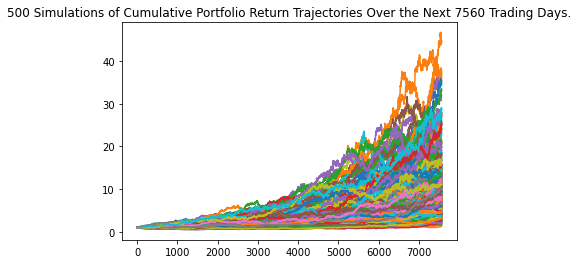

In [74]:
# Plot simulation outcomes
line_plot = MC.plot_simulation()

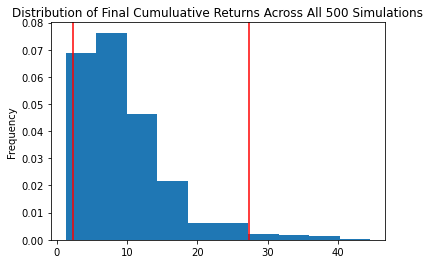

In [75]:
# Plot probability distribution and confidence intervals
dist_plot = MC.plot_distribution()

### Retirement Analysis

In [76]:
# Fetch summary statistics from the Monte Carlo simulation results
summary_stats = MC.summarize_cumulative_return()

# Print summary statistics
print(summary_stats)

count           500.000000
mean              9.551211
std               6.490865
min               1.290294
25%               5.029721
50%               7.694719
75%              12.450360
max              44.558335
95% CI Lower      2.294357
95% CI Upper     27.382833
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a `$20,000` initial investment.

In [78]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_upper = round(summary_stats[9]*initial_investment,2)
ci_lower = round(summary_stats[8]*initial_investment,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $45887.13 and $547656.66


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [79]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_upper = round(summary_stats[9]*initial_investment,2)
ci_lower = round(summary_stats[8]*initial_investment,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $68830.7 and $821484.99


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [90]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
mcfive = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*5)


In [91]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
mcfive.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.000506,0.989035,1.005811,0.998437,0.992417,1.008626,1.001694,1.012299,1.002573,1.002346,...,1.003118,0.995301,1.002233,0.988153,0.995954,0.989370,1.001954,0.996709,0.998393,1.000200
2,1.005688,0.975747,1.022045,0.994917,1.001709,1.007492,0.997601,1.014363,1.007357,0.995146,...,0.989729,1.003832,1.015523,0.994685,0.997511,0.978481,1.007485,1.000187,0.998222,0.994469
3,1.015614,0.972337,1.020589,0.990089,0.997088,1.012069,0.994459,1.023974,0.998269,0.997117,...,0.986272,0.995303,1.017568,0.994117,0.996933,0.979614,1.005447,1.000904,0.992325,1.005501
4,1.009018,0.975380,1.014976,0.990540,1.008933,1.014162,1.006040,1.038244,0.993445,1.000146,...,0.996307,0.996340,1.005483,1.005114,0.998103,0.979850,1.008402,1.007809,0.986602,1.016296
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,2.020199,1.320570,1.043961,0.777438,1.373146,2.308520,1.265621,1.015479,1.491971,1.134459,...,1.213470,2.091899,1.840693,1.201827,1.383267,2.049934,1.463310,1.784834,1.237013,1.006954
1257,2.023157,1.332759,1.047747,0.776240,1.387635,2.304663,1.258377,1.017105,1.501050,1.137857,...,1.206709,2.096006,1.851356,1.198292,1.356059,2.059395,1.439390,1.771399,1.251139,1.005516
1258,2.037755,1.308798,1.046945,0.777932,1.390920,2.297247,1.254129,1.014445,1.501325,1.139660,...,1.204894,2.099545,1.828934,1.185654,1.354250,2.056315,1.437917,1.767181,1.245102,0.998431
1259,2.016572,1.310378,1.043072,0.780819,1.398911,2.265089,1.239312,1.012671,1.505352,1.139177,...,1.187760,2.077249,1.821726,1.191020,1.334258,2.045497,1.468051,1.772508,1.241128,1.001381


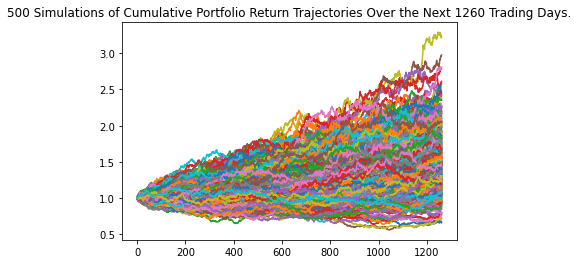

In [92]:
# Plot simulation outcomes
mcfive.plot_simulation()

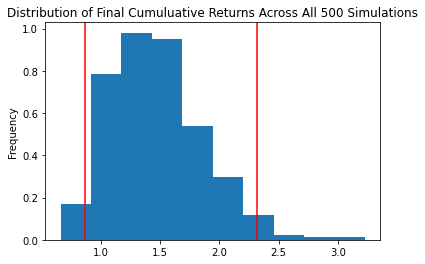

In [93]:
# Plot probability distribution and confidence intervals
mcfive.plot_distribution()

In [95]:
# Fetch summary statistics from the Monte Carlo simulation results
summary_stats_five = mcfive.summarize_cumulative_return()

# Print summary statistics
summary_stats_five

count           500.000000
mean              1.470404
std               0.395380
min               0.658204
25%               1.180741
50%               1.437269
75%               1.707363
max               3.227680
95% CI Lower      0.860959
95% CI Upper      2.319258
Name: 1260, dtype: float64

In [97]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_upper_five = round(summary_stats_five[9]*initial_investment,2)
ci_lower_five = round(summary_stats_five[8]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 5 years will end within in the range of $17219.18 and $46385.16


### Ten Years Retirement Option

In [100]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
mcten = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*10)

In [101]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
mcten.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.000388,0.997769,1.000649,0.994646,1.007697,1.004184,0.990903,1.005146,1.002245,0.999146,...,1.002534,0.990064,0.990829,0.989193,1.009575,0.992601,0.992228,0.998146,1.008839,0.991860
2,1.000476,1.000187,0.994952,0.996185,1.000219,0.992637,0.987355,0.998031,0.990997,1.000583,...,1.003800,0.990328,0.997709,0.992160,0.998784,0.985683,0.995107,1.001358,1.008070,0.983012
3,1.004156,0.999917,0.997579,0.988131,0.989117,0.995179,0.969976,1.009505,0.992449,0.995223,...,1.015023,0.985896,0.999833,0.990398,1.006139,0.986855,1.010570,1.005226,1.013940,0.976722
4,0.994516,0.998645,1.003682,0.993784,0.999516,0.986124,0.974139,1.024689,0.988949,0.980887,...,1.029417,0.982535,1.002231,0.979061,1.003052,0.986234,1.015819,1.010939,1.027768,0.987564
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,1.313705,2.172055,2.180708,1.278562,0.855756,3.520979,1.472537,2.218038,1.915813,1.100081,...,2.366496,1.587355,1.294959,2.882056,2.866469,2.285512,1.614374,1.224666,3.324625,1.122844
2517,1.307711,2.177246,2.193782,1.262196,0.855184,3.513663,1.470215,2.222147,1.935186,1.107889,...,2.377325,1.559461,1.303833,2.906255,2.859417,2.290115,1.615526,1.223902,3.335805,1.124964
2518,1.314350,2.194196,2.206772,1.251968,0.854600,3.519948,1.460985,2.222088,1.940035,1.119939,...,2.367095,1.562156,1.291796,2.884657,2.852756,2.264081,1.603642,1.227078,3.318736,1.133384
2519,1.308690,2.195873,2.189522,1.258218,0.850147,3.533364,1.472254,2.237873,1.933722,1.113949,...,2.361951,1.557196,1.294351,2.888420,2.850025,2.258274,1.603928,1.231259,3.296088,1.133730


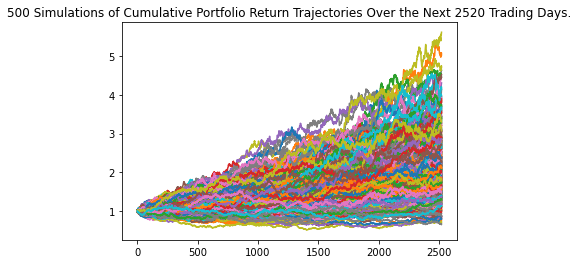

In [102]:
# Plot simulation outcomes
mcten.plot_simulation()

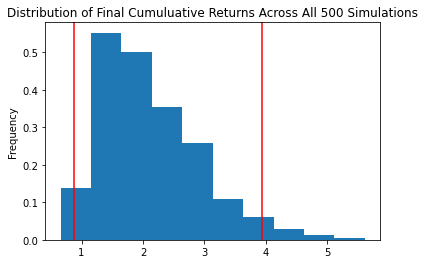

In [103]:
# Plot probability distribution and confidence intervals
mcten.plot_distribution()

In [104]:
# Fetch summary statistics from the Monte Carlo simulation results
ten_yr_summary = mcten.summarize_cumulative_return()

# Print summary statistics
print(ten_yr_summary)

count           500.000000
mean              2.098911
std               0.804906
min               0.657629
25%               1.482591
50%               1.951974
75%               2.552593
max               5.614410
95% CI Lower      0.881063
95% CI Upper      3.943203
Name: 2520, dtype: float64


In [106]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_upper_ten = round(ten_yr_summary[9]*initial_investment,2)
ci_lower_ten = round(ten_yr_summary[8]*initial_investment,2)


# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 10 years will end within in the range of $17621.25 and $78864.05
